# Workflow

- newsData (alebelled) -> Data Preprocessing -> Train Test Split -> Model Train -> Model Metrics
- new Data -> Trained Model -> Prediction on new Data

In [56]:
# !pip install nltk

## Libraries Import

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

from nltk.corpus import stopwords # which does add the wigth to out text "the""a" etc.
from nltk.stem.porter import PorterStemmer # convert same more words into single 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [58]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sande\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [59]:
print(stopwords.words('English'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

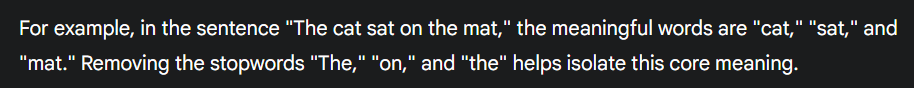
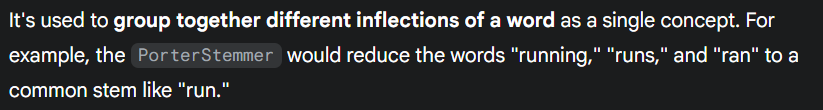

## Data Loading

In [60]:
news_df = pd.read_csv("../Datasets/WELFake_Dataset.csv")

## Data Preprocessing

In [61]:
news_df.shape

(72134, 4)

In [62]:
columns = news_df.columns
columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [63]:
news_df.drop(columns=['Unnamed: 0'], inplace=True)

In [64]:
news_df.head()


,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [65]:
news_df.iloc[0:1,]["text"]

0    No comment is expected from Barack Obama Membe...
Name: text, dtype: object

In [66]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71576 non-null  object
 1   text    72095 non-null  object
 2   label   72134 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [67]:
# news_df.corr() since this is text data (object data)

### Null values

In [68]:
news_df.isnull().sum()

title    558
text      39
label      0
dtype: int64

In [69]:
# since we have wnough datastes we can replace the null vlsues to mepty string
news_df = news_df.fillna("")
news_df.isnull().sum()


title    0
text     0
label    0
dtype: int64

In [70]:
X = news_df.iloc[:,:2]
y = news_df['label']
X.shape, y.shape

((72134, 2), (72134,))

### Flow

- word (lowercase) -> stopwords -> stemming (PorterStemmer().stem(word))

### Stemming

- it is used to reduce the words to root word
- actors ,actoress, acting, actor -> act or actor

In [71]:
port_stem = PorterStemmer()

def stemming(content):
    # remove or substitue letter with is not letter substitute with ' '
    stemmed_content = re.sub('[^a-zA-z]', ' ', content)
    # lower and split
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    ans = []
    for word in stemmed_content:
        #  if it not the word such as 'as' 'a' 'the'
        if not word in stopwords.words('english'):
            # append the replaced values
            ans.append(port_stem.stem(word))
        
    stemmed_content = ' '.join(ans)
    return stemmed_content


In [72]:
news_df['title'] = news_df['title'].apply(stemming)

In [73]:
news_df['text'] = news_df['text'].apply(stemming)

## converting textudal data to numerical data

In [74]:
# Apply stemming if needed
# news_df['title'] = news_df['title'].apply(stemming)
# news_df['text'] = news_df['text'].apply(stemming)

# Select features and label
X = news_df[['title', 'text']]
y = news_df['label']

# Combine 'title' and 'text' columns into a single string for each row
X_combined = X['title'] + " " + X['text']

# Vectorize the combined text
vectorizer = TfidfVectorizer()
vectorizer.fit(X_combined)
X = vectorizer.transform(X_combined)

# Check shapes
X.shape, y.shape

((72134, 164497), (72134,))

## split the datasets

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((57707, 164497), (14427, 164497), (57707,), (14427,))

## Training Model

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# 1. Initialize your model
model = LogisticRegression()

# 2. Define the hyperparameters you want to test
#    'C' is the regularization parameter for Logistic Regression
param_grid = {'C': [0.1, 1, 10, 100]}

# 3. Set up GridSearchCV
#    It will test each 'C' value using 5-fold cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# 4. Run the search on your data (assuming X and Y are your full datasets)
grid_search.fit(X_test, Y_test)

# 5. Get the best results
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_ * 100:.2f}%")

Best Hyperparameters: {'C': 100}
Best Cross-Validation Accuracy: 93.76%


In [78]:
# 1. Use the best model to predict on the test set
Y_pred = grid_search.predict(X_test)

# 2. Calculate the accuracy score
test_accuracy = accuracy_score(Y_test, Y_pred)

print(f"Final Accuracy on the Test Set: {test_accuracy * 100:.2f}%")

Final Accuracy on the Test Set: 99.99%


In [80]:
import os
import joblib

# Create 'models' directory if it doesn't exist
os.makedirs('../models', exist_ok=True)

# Save the GridSearchCV object, which contains the best model
joblib.dump(grid_search, '../models/fake_news_model.pkl')

# Save the vectorizer
joblib.dump(vectorizer, '../models/vectorizer.pkl')

print("GridSearchCV model and vectorizer saved successfully!")

GridSearchCV model and vectorizer saved successfully!
